Question: Are delays independent to time of day, or day of week?

Developer: TANMOY DAS <br>
Date: May 15, 2022


Outline of this Python Notebook:
1. Data Exploration
2. Premodeling (Feature Engineering)
3. Time Series Analysis

# Data Exploration

SE Terminal

## Data Importing & Preprocessing

In [42]:
# import necessarry Python libraries
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import datetime

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure
import plotly.express as px
import plotly.io as pio
pio.templates 

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [43]:
# import data for 2022
data2022 = pd.read_excel('Data/SE - Terminal Wait Times 2020_2022.xlsx', sheet_name='2022').copy() 

In [44]:
data2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29809 entries, 0 to 29808
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transponder       29809 non-null  int64         
 1   LocationIn        29809 non-null  object        
 2   LocationOut       29809 non-null  object        
 3   TimeIn            29809 non-null  datetime64[ns]
 4   TimeOut           29809 non-null  datetime64[ns]
 5   Difference (min)  29809 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 1.4+ MB


In [45]:
# Convert datetime to date
data2022['Date'] = pd.to_datetime(data2022['TimeIn']).dt.date 

# Create DAY column
days = ['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
weekday = []
for i in data2022['Date']:
    weekday.append(days[i.weekday()])
   # print(i)
data2022['Weekday'] = weekday

# Create MONTH column
data2022['Month'] = [i.strftime("%B") for i in data2022['Date']]

# Rename column to "Delay"
data2022.rename(columns = {'Difference (min)':'Delay'}, inplace = True)



In [46]:
# Create HOUR column
hours = ['07:00-07:59','08:00-08:59','09:00-09:59','10:00-10:59','11:00-11:59','12:00-12:59','13:00-13:59', 
        '14:00-14:59', '15:00-15:59', '16:00-16:59', '17:00-17:59', '18:00-18:59', '19:00-20:00']
Hours = []
for i in data2022['TimeIn']:
    if (i.time() > datetime.time(7, 0, 0) and i.time() < datetime.time(8, 0, 0) ):
        Hours.append('07:00-07:59') 
    elif(i.time() >= datetime.time(8, 0, 0) and i.time() < datetime.time(9, 0, 0) ):
        Hours.append('08:00-08:59')
    elif(i.time() >= datetime.time(9, 0, 0) and i.time() < datetime.time(10, 0, 0) ):
        Hours.append('09:00-09:59')
    elif(i.time() >= datetime.time(10, 0, 0) and i.time() < datetime.time(11, 0, 0) ):
        Hours.append('10:00-10:59')
    elif(i.time() >= datetime.time(11, 0, 0) and i.time() < datetime.time(12, 0, 0) ):
        Hours.append('11:00-11:59')
    elif(i.time() >= datetime.time(12, 0, 0) and i.time() < datetime.time(13, 0, 0) ):
        Hours.append('12:00-12:59')
    elif(i.time() >= datetime.time(13, 0, 0) and i.time() < datetime.time(14, 0, 0) ):
        Hours.append('13:00-13:59')
    elif(i.time() >= datetime.time(14, 0, 0) and i.time() < datetime.time(15, 0, 0) ):
        Hours.append('14:00-14:59')
    elif(i.time() >= datetime.time(15, 0, 0) and i.time() < datetime.time(16, 0, 0) ):
        Hours.append('15:00-15:59')
    elif(i.time() >= datetime.time(16, 0, 0) and i.time() < datetime.time(17, 0, 0) ):
        Hours.append('16:00-16:59')
    elif(i.time() >= datetime.time(17, 0, 0) and i.time() < datetime.time(18, 0, 0) ):
        Hours.append('17:00-17:59')
    elif(i.time() >= datetime.time(18, 0, 0) and i.time() < datetime.time(19, 0, 0) ):
        Hours.append('18:00-18:59')
    else:
        Hours.append('19:00-20:00')
data2022['Hours'] = Hours

In [47]:
data2022

Transponder LocationIn LocationOut              TimeIn  \
0             8230       2(A)       2(En) 2022-01-03 10:18:52   
1            11839       2(A)       2(En) 2022-01-03 10:52:33   
2             8160       2(A)       2(En) 2022-01-03 10:45:37   
3            11391       2(A)       2(En) 2022-01-03 11:17:15   
4            43698       2(A)       2(En) 2022-01-03 11:12:13   
...            ...        ...         ...                 ...   
29804        58660      2(En)       2(Ex) 2022-03-31 19:12:26   
29805        58660       2(A)       2(Ex) 2022-03-31 19:03:53   
29806         8160       2(A)       2(Ex) 2022-03-31 19:08:27   
29807         8456      2(En)       2(Ex) 2022-03-31 19:27:31   
29808         8456       2(A)       2(Ex) 2022-03-31 19:20:51   

                  TimeOut  Delay        Date Weekday    Month        Hours  
0     2022-01-03 11:05:40      6  2022-01-03     Mon  January  10:00-10:59  
1     2022-01-03 11:06:57      7  2022-01-03     Mon  January  10:00-10:59  
2     2022-01-03 11:08:21      8  2022-01-03     Mon  January  10:00-10:59  
3     2022-01-03 11:18:41      1  2022-01-03     Mon  January  11:00-11:59  
4     2022-01-03 11:19:00      7  2022-01-03     Mon  January  11:00-11:59  
...                   ...    ...         ...     ...      ...          ...  
29804 2022-03-31 19:36:49     24  2022-03-31   Thurs    March  19:00-20:00  
29805 2022-03-31 19:36:49     33  2022-03-31   Thurs    March  19:00-20:00  
29806 2022-03-31 19:38:26     30  2022-03-31   Thurs    March  19:00-20:00  
29807 2022-03-31 19:43:26     16  2022-03-31   Thurs    March  19:00-20:00  
29808 2022-03-31 19:43:26     23  2022-03-31   Thurs    March  19:00-20:00  

[29809 rows x 10 columns]

In [48]:
display(data2022.groupby(['Weekday']).sum())

display(data2022.groupby(['Weekday']).mean())


Transponder   Delay
Weekday                     
Fri        139180103  353829
Mon        114137243  255259
Sat          4815103    5305
Thurs      137599944  298612
Tues       145193457  317407
Wed        141794727  295817

Transponder      Delay
Weekday                         
Fri      23514.124514  59.778510
Mon      22596.959612  50.536329
Sat      24442.147208  26.928934
Thurs    22743.792397  49.357355
Tues     23039.266423  50.366074
Wed      22542.881876  47.029730

In [49]:
display(data2022.groupby(['Hours']).sum())

#display(data2022.groupby(['Hours']).mean())


Transponder   Delay
Hours                           
07:00-07:59       223236     485
08:00-08:59       524829    1464
09:00-09:59      3505313   11976
10:00-10:59     20609145   63573
11:00-11:59     51807291  139002
12:00-12:59     79048383  154534
13:00-13:59     81869597  156230
14:00-14:59     84149067  183203
15:00-15:59     68010210  206859
16:00-16:59     55406054  164752
17:00-17:59     79659658  166206
18:00-18:59     75695946  133356
19:00-20:00     82211848  144589

## Trend of DELAY over the years

In [50]:
data2022

Transponder LocationIn LocationOut              TimeIn  \
0             8230       2(A)       2(En) 2022-01-03 10:18:52   
1            11839       2(A)       2(En) 2022-01-03 10:52:33   
2             8160       2(A)       2(En) 2022-01-03 10:45:37   
3            11391       2(A)       2(En) 2022-01-03 11:17:15   
4            43698       2(A)       2(En) 2022-01-03 11:12:13   
...            ...        ...         ...                 ...   
29804        58660      2(En)       2(Ex) 2022-03-31 19:12:26   
29805        58660       2(A)       2(Ex) 2022-03-31 19:03:53   
29806         8160       2(A)       2(Ex) 2022-03-31 19:08:27   
29807         8456      2(En)       2(Ex) 2022-03-31 19:27:31   
29808         8456       2(A)       2(Ex) 2022-03-31 19:20:51   

                  TimeOut  Delay        Date Weekday    Month        Hours  
0     2022-01-03 11:05:40      6  2022-01-03     Mon  January  10:00-10:59  
1     2022-01-03 11:06:57      7  2022-01-03     Mon  January  10:00-10:59  
2     2022-01-03 11:08:21      8  2022-01-03     Mon  January  10:00-10:59  
3     2022-01-03 11:18:41      1  2022-01-03     Mon  January  11:00-11:59  
4     2022-01-03 11:19:00      7  2022-01-03     Mon  January  11:00-11:59  
...                   ...    ...         ...     ...      ...          ...  
29804 2022-03-31 19:36:49     24  2022-03-31   Thurs    March  19:00-20:00  
29805 2022-03-31 19:36:49     33  2022-03-31   Thurs    March  19:00-20:00  
29806 2022-03-31 19:38:26     30  2022-03-31   Thurs    March  19:00-20:00  
29807 2022-03-31 19:43:26     16  2022-03-31   Thurs    March  19:00-20:00  
29808 2022-03-31 19:43:26     23  2022-03-31   Thurs    March  19:00-20:00  

[29809 rows x 10 columns]

In [51]:
data2022_groupbyDate = data2022.groupby(['Date','Month','Weekday']).sum().reset_index()
data2022_groupbyDate
# this Delay is delay of all truck in certain date 



Date    Month Weekday  Transponder  Delay
0   2022-01-03  January     Mon      4093748   7452
1   2022-01-04  January    Tues      8680465  21122
2   2022-01-05  January     Wed      9488552  17297
3   2022-01-06  January   Thurs     11402097  21555
4   2022-01-07  January     Fri      8701325  26096
..         ...      ...     ...          ...    ...
59  2022-03-25    March     Fri     14581172  32413
60  2022-03-28    March     Mon     12598617  18573
61  2022-03-29    March    Tues     10960035  20530
62  2022-03-30    March     Wed     10496428  18014
63  2022-03-31    March   Thurs     11233831  20247

[64 rows x 5 columns]

In [52]:
max(data2022_groupbyDate['Delay'])


48905

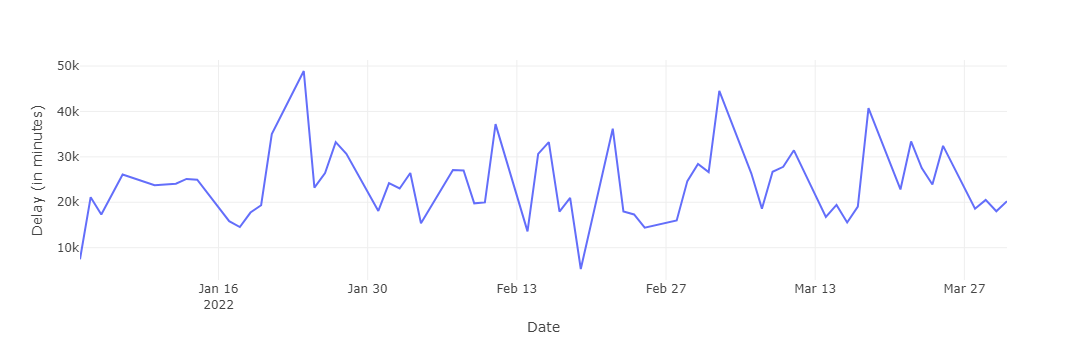

In [53]:

fig = px.line(data2022_groupbyDate, x='Date', y= 'Delay', labels={'Delay': 'Delay (in minutes)'})
fig2 = px.scatter(x=['2022-03-17', '2022-03-27'], y=[max(data2022_groupbyDate['Delay']), min(data2022_groupbyDate['Delay'])],
                 size=[120,100], template="simple_white")
#fig.add_trace(fig2.data[0])
fig.update_layout(template="none")
fig.show()
fig.write_image("Figures/LineplotyearlyFC2022.png")

The above Line graph tells us that there are lots of delay. But, does not tell us which days have more delays! 


## Trend of DELAY for days of week

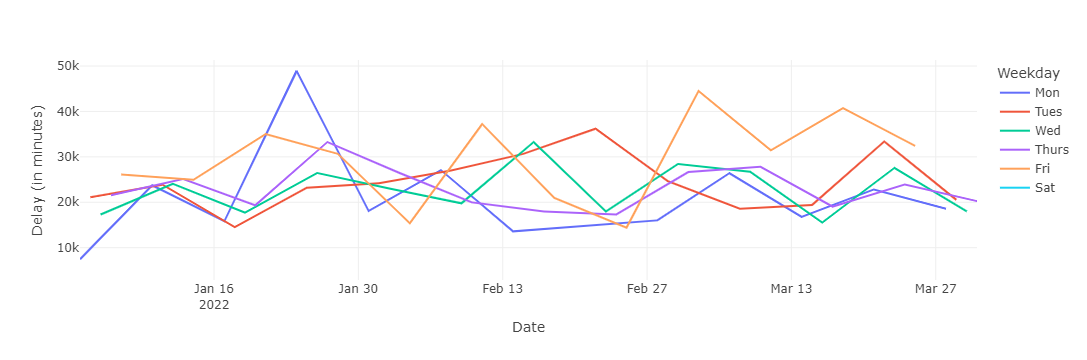

In [54]:
fig = px.line(data2022_groupbyDate, x='Date', y= 'Delay', color='Weekday' ,
              labels={'Delay': 'Delay (in minutes)'})
fig.update_layout(template="none")
fig.show()
fig.write_image("Figures/LineplotWeekdayFC2022.png")

No day is significantly better than the other! 

## Trend of DELAY for time of day


Lets split days into Morning, Afternoon & Evening 

In [55]:
data2022

Transponder LocationIn LocationOut              TimeIn  \
0             8230       2(A)       2(En) 2022-01-03 10:18:52   
1            11839       2(A)       2(En) 2022-01-03 10:52:33   
2             8160       2(A)       2(En) 2022-01-03 10:45:37   
3            11391       2(A)       2(En) 2022-01-03 11:17:15   
4            43698       2(A)       2(En) 2022-01-03 11:12:13   
...            ...        ...         ...                 ...   
29804        58660      2(En)       2(Ex) 2022-03-31 19:12:26   
29805        58660       2(A)       2(Ex) 2022-03-31 19:03:53   
29806         8160       2(A)       2(Ex) 2022-03-31 19:08:27   
29807         8456      2(En)       2(Ex) 2022-03-31 19:27:31   
29808         8456       2(A)       2(Ex) 2022-03-31 19:20:51   

                  TimeOut  Delay        Date Weekday    Month        Hours  
0     2022-01-03 11:05:40      6  2022-01-03     Mon  January  10:00-10:59  
1     2022-01-03 11:06:57      7  2022-01-03     Mon  January  10:00-10:59  
2     2022-01-03 11:08:21      8  2022-01-03     Mon  January  10:00-10:59  
3     2022-01-03 11:18:41      1  2022-01-03     Mon  January  11:00-11:59  
4     2022-01-03 11:19:00      7  2022-01-03     Mon  January  11:00-11:59  
...                   ...    ...         ...     ...      ...          ...  
29804 2022-03-31 19:36:49     24  2022-03-31   Thurs    March  19:00-20:00  
29805 2022-03-31 19:36:49     33  2022-03-31   Thurs    March  19:00-20:00  
29806 2022-03-31 19:38:26     30  2022-03-31   Thurs    March  19:00-20:00  
29807 2022-03-31 19:43:26     16  2022-03-31   Thurs    March  19:00-20:00  
29808 2022-03-31 19:43:26     23  2022-03-31   Thurs    March  19:00-20:00  

[29809 rows x 10 columns]

In [56]:
# hour category


In [57]:
timeofday = ['Morning','Early-afternoon','Late-afternoon','Evening']
TimeOfDayColumn = []
for i in data2022['TimeIn']:
    if (i.time() > datetime.time(6, 0, 0) and i.time() < datetime.time(12, 0, 0) ):
        TimeOfDayColumn.append('Morning') 
    elif(i.time() >= datetime.time(12, 0, 0) and i.time() < datetime.time(15, 0, 0) ):
        TimeOfDayColumn.append('Early-afternoon')
    elif(i.time() >= datetime.time(15, 0, 0) and i.time() < datetime.time(18, 0, 0) ):
        TimeOfDayColumn.append('Late-afternoon')
    else:
        TimeOfDayColumn.append('Evening')
data2022['Time Of Day'] = TimeOfDayColumn


In [58]:
data2022_groupbyDate = data2022.groupby(['Date','Month','Weekday']).sum().reset_index()
data2022_groupbyDate
# this Delay is delay of all truck in certain date 



Date    Month Weekday  Transponder  Delay
0   2022-01-03  January     Mon      4093748   7452
1   2022-01-04  January    Tues      8680465  21122
2   2022-01-05  January     Wed      9488552  17297
3   2022-01-06  January   Thurs     11402097  21555
4   2022-01-07  January     Fri      8701325  26096
..         ...      ...     ...          ...    ...
59  2022-03-25    March     Fri     14581172  32413
60  2022-03-28    March     Mon     12598617  18573
61  2022-03-29    March    Tues     10960035  20530
62  2022-03-30    March     Wed     10496428  18014
63  2022-03-31    March   Thurs     11233831  20247

[64 rows x 5 columns]

In [59]:
data2022_groupbyTimeofDay = data2022.groupby(['Date','Month','Time Of Day']).sum().reset_index()
data2022_groupbyTimeofDay
# this Delay is delay of all truck in certain date 

Date    Month      Time Of Day  Transponder  Delay
0    2022-01-03  January  Early-afternoon      1765596   2317
1    2022-01-03  January          Evening       954319    768
2    2022-01-03  January   Late-afternoon       979656   2794
3    2022-01-03  January          Morning       394177   1573
4    2022-01-04  January  Early-afternoon      3156047   4450
..          ...      ...              ...          ...    ...
249  2022-03-30    March          Morning      2429657   4225
250  2022-03-31    March  Early-afternoon      5101908   8798
251  2022-03-31    March          Evening      1558190   2038
252  2022-03-31    March   Late-afternoon      2710570   5896
253  2022-03-31    March          Morning      1863163   3515

[254 rows x 5 columns]

In [60]:
data2022_groupbyHours = data2022.groupby(['Date','Month','Hours']).sum().reset_index()
data2022_groupbyHours
# this Delay is delay of all truck in certain date 

Date    Month        Hours  Transponder  Delay
0    2022-01-03  January  07:00-07:59        77594    201
1    2022-01-03  January  10:00-10:59        56458    374
2    2022-01-03  January  11:00-11:59       260125    998
3    2022-01-03  January  12:00-12:59       604280    863
4    2022-01-03  January  13:00-13:59       377126    641
..          ...      ...          ...          ...    ...
659  2022-03-31    March  15:00-15:59       513658   2219
660  2022-03-31    March  16:00-16:59      1188998   2020
661  2022-03-31    March  17:00-17:59      1007914   1657
662  2022-03-31    March  18:00-18:59      1210043   1801
663  2022-03-31    March  19:00-20:00       348147    237

[664 rows x 5 columns]

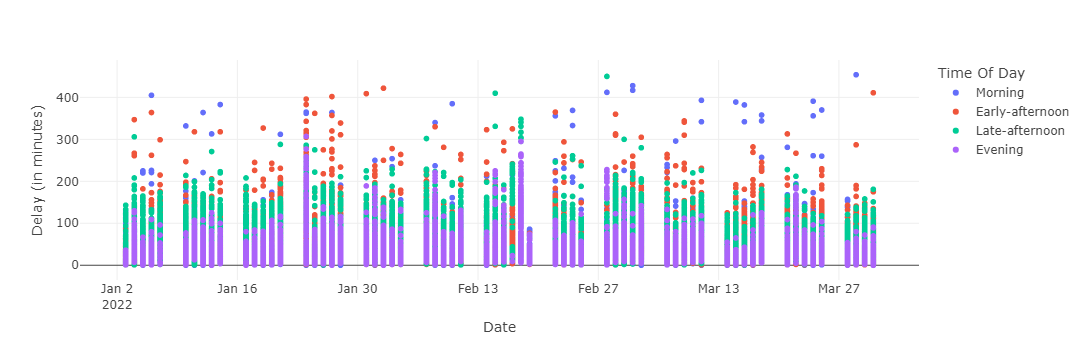

In [61]:
fig = px.scatter(data2022, x='Date', y= 'Delay', color='Time Of Day' ,
              labels={'Delay': 'Delay (in minutes)'})
fig.update_layout(template="none")
fig.show()

Most of the truck leave quite quickly in the morning ++ ?? 


In [62]:
# Number of trucks in the morning vs evening


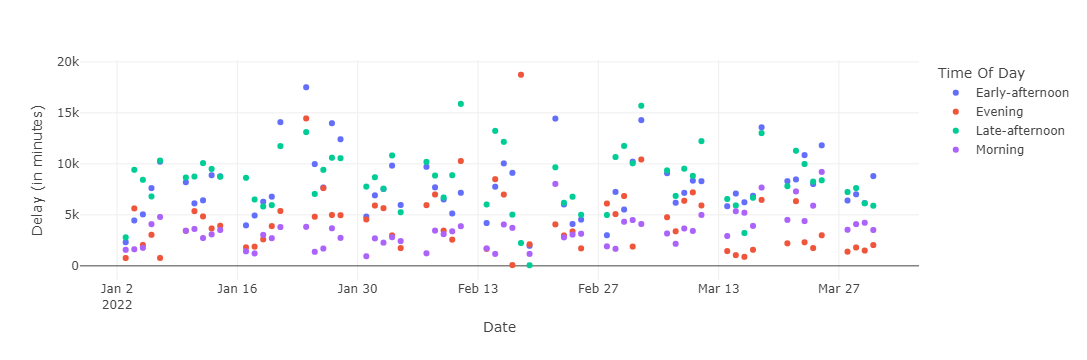

In [63]:

fig = px.scatter(data2022_groupbyTimeofDay, x='Date', y= 'Delay', color='Time Of Day' ,
              labels={'Delay': 'Delay (in minutes)'})
fig.update_layout(template="none")
fig.show()

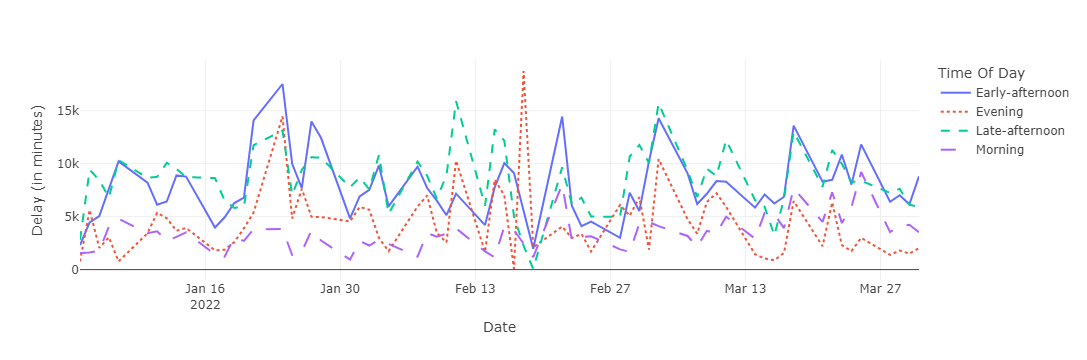

In [64]:

fig = px.line(data2022_groupbyTimeofDay, x='Date', y= 'Delay', color='Time Of Day' ,
              labels={'Delay': 'Delay (in minutes)'}, line_dash='Time Of Day')
fig.update_layout(template="none")
fig.show()
fig.write_image("Figures/LineplotTimeofDayFC2022.png")

In recent weeks, we have more delays in the evening. So, we should reschudle our evening trucks on other time (maybe extending current opening hour of terminal gates, which is 16:30 as per last week). After all, leaving of trucks during high-peak office hour & pedestrian walk in this summer time is NOT impressive.  

In [65]:
#pip install chart-studio

### Bubble Plot

In [66]:
data2022_groupbyTimeofDayBubblePlot = data2022.groupby(['Date','Month','Time Of Day', 'Weekday', 'LocationIn']).sum().reset_index()
data2022_groupbyTimeofDayBubblePlot

Date    Month      Time Of Day Weekday LocationIn  Transponder  \
0    2022-01-03  January  Early-afternoon     Mon       2(A)      1136552   
1    2022-01-03  January  Early-afternoon     Mon      2(En)       629044   
2    2022-01-03  January          Evening     Mon       2(A)       650105   
3    2022-01-03  January          Evening     Mon      2(En)       304214   
4    2022-01-03  January   Late-afternoon     Mon       2(A)       619862   
..          ...      ...              ...     ...        ...          ...   
500  2022-03-31    March          Evening   Thurs      2(En)       553579   
501  2022-03-31    March   Late-afternoon   Thurs       2(A)      1589169   
502  2022-03-31    March   Late-afternoon   Thurs      2(En)      1121401   
503  2022-03-31    March          Morning   Thurs       2(A)      1092374   
504  2022-03-31    March          Morning   Thurs      2(En)       770789   

     Delay  
0     1321  
1      996  
2      418  
3      350  
4     1795  
..     ...  
500    881  
501   3872  
502   2024  
503   1760  
504   1755  

[505 rows x 7 columns]

In [67]:
data2022_groupbyTimeofDayBubblePlot.columns

Index(['Date', 'Month', 'Time Of Day', 'Weekday', 'LocationIn', 'Transponder',
       'Delay'],
      dtype='object')

In [68]:
data2022_groupbyTimeofDayBubblePlot.Transponder.unique()
data2022_groupbyTimeofDayBubblePlot.nunique()

Date            64
Month            3
Time Of Day      4
Weekday          6
LocationIn       2
Transponder    505
Delay          483
dtype: int64

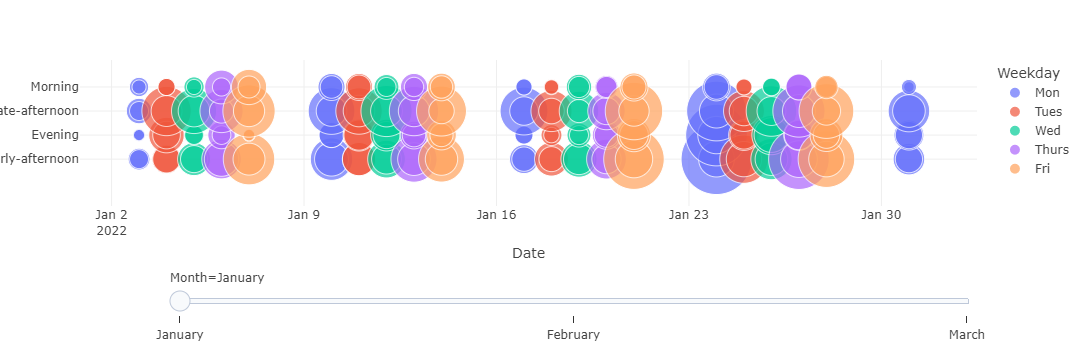

<Figure size 2400x1800 with 0 Axes>

In [69]:

figure(figsize=(8, 6), dpi=300)
fig = px.scatter(data2022_groupbyTimeofDayBubblePlot, x="Date", y="Time Of Day", labels={'Time Of Day': ''},
                 animation_frame="Month", # animation_group="LocationIn",hover_name="LocationIn" ,
           size="Delay", color="Weekday",
           size_max=55) # , range_x=[     100,100000], range_y=[25,90], 

fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.update_layout(template="none")
fig.show()
fig.write_image("Figures/BubbleplotTimeofDayFC2022.png")

Delay is not dependent on day of week (linegraph), but depends on time of day, more in afternoon.

Now one can argue how I categohour into time of day? Show hourly delay for same dataset.. is the trend similar? Lets find out in the "Trend of Delay by Hours" section

## Trend of DELAY by Hours

In [70]:
data2022_groupbyHours = data2022.groupby(['Date','Month','Time Of Day', 'Weekday', 'LocationIn', 'Hours']).sum().reset_index()
data2022_groupbyHours

Date    Month      Time Of Day Weekday LocationIn        Hours  \
0     2022-01-03  January  Early-afternoon     Mon       2(A)  12:00-12:59   
1     2022-01-03  January  Early-afternoon     Mon       2(A)  13:00-13:59   
2     2022-01-03  January  Early-afternoon     Mon       2(A)  14:00-14:59   
3     2022-01-03  January  Early-afternoon     Mon      2(En)  12:00-12:59   
4     2022-01-03  January  Early-afternoon     Mon      2(En)  13:00-13:59   
...          ...      ...              ...     ...        ...          ...   
1248  2022-03-31    March          Morning   Thurs       2(A)  10:00-10:59   
1249  2022-03-31    March          Morning   Thurs       2(A)  11:00-11:59   
1250  2022-03-31    March          Morning   Thurs      2(En)  09:00-09:59   
1251  2022-03-31    March          Morning   Thurs      2(En)  10:00-10:59   
1252  2022-03-31    March          Morning   Thurs      2(En)  11:00-11:59   

      Transponder  Delay  
0          418934    526  
1          226254    337  
2          491364    458  
3          185346    337  
4          150872    304  
...           ...    ...  
1248       453766    542  
1249       441820    628  
1250        67982    258  
1251       270391    881  
1252       432416    616  

[1253 rows x 8 columns]

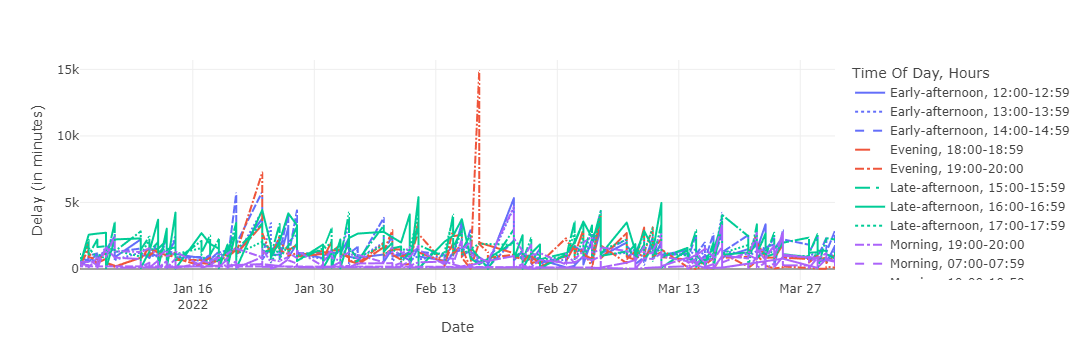

In [71]:
fig = px.line(data2022_groupbyHours, x='Date', y= 'Delay', color='Time Of Day' , #range_color= [5,8],
              labels={'Delay': 'Delay (in minutes)'}, line_dash='Hours')
fig.update_layout(template="none")
fig.show()
fig.write_image("Figures/LineJanMarFC2022.png")

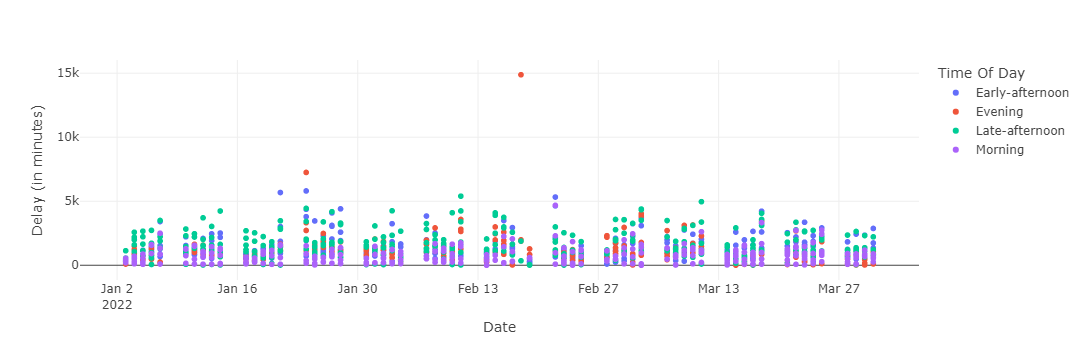

In [72]:
fig = px.scatter(data2022_groupbyHours, x='Date', y= 'Delay', color='Time Of Day' , #range_color= [5,8],
              labels={'Delay': 'Delay (in minutes)'})
fig.update_layout(template="none")
fig.show()
fig.write_image("Figures/scatterplotTimeofDayFC2022.png")

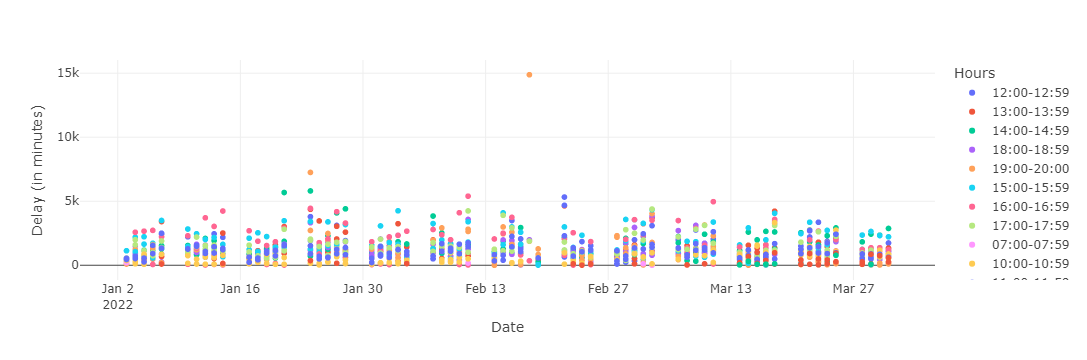

In [73]:
fig = px.scatter(data2022_groupbyHours, x='Date', y= 'Delay', color='Hours' , #range_color= [5,8],
              labels={'Delay': 'Delay (in minutes)'}) #, legend={'traceorder':'normal'}
fig.update_layout(template="none")
fig.show() 
# ++ change color pallete & transparency alpha 

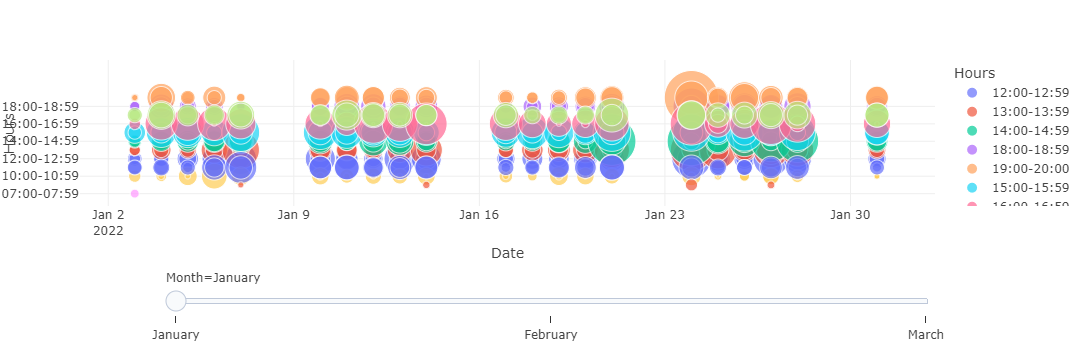

<Figure size 2400x1800 with 0 Axes>

In [74]:
figure(figsize=(8, 6), dpi=300)
fig = px.scatter(data2022_groupbyHours, x="Date", y="Hours", animation_frame="Month",  # animation_group="LocationIn",hover_name="LocationIn" ,
           size="Delay", color="Hours",
           size_max=55) # , range_x=[     100,100000], range_y=[25,90], 

fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.update_yaxes(categoryorder="category ascending")
fig.update_layout(template="none")
fig.show()

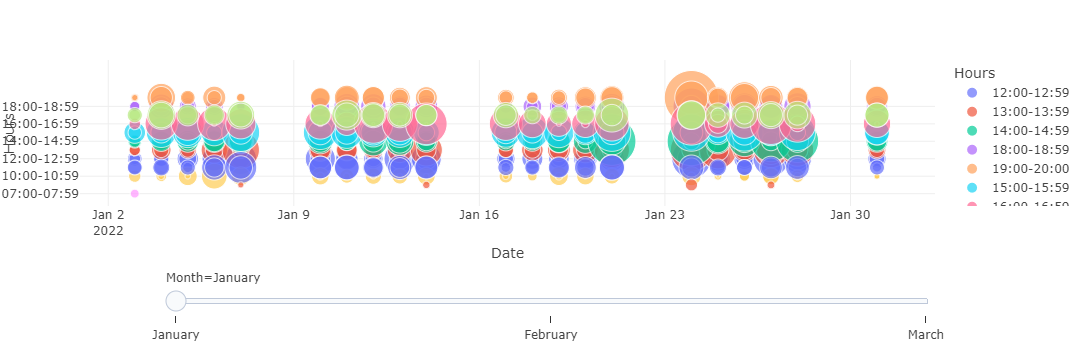

In [75]:
#fig=plt.figure(figsize=(12,12), dpi= 100, facecolor='w', edgecolor='k')
fig = px.scatter(data2022_groupbyHours, x="Date", y="Hours", animation_frame="Month",  # animation_group="LocationIn",hover_name="LocationIn" ,
           size="Delay", color="Hours",
           size_max=55) # , range_x=[     100,100000], range_y=[25,90], 

fig["layout"].pop("updatemenus") # optional, drop animation buttons

fig.update_yaxes(categoryorder="category ascending")
fig.update_layout(template="none")
fig.show()

fig.write_image("Figures/BubbleplotHourFC20202022.png")

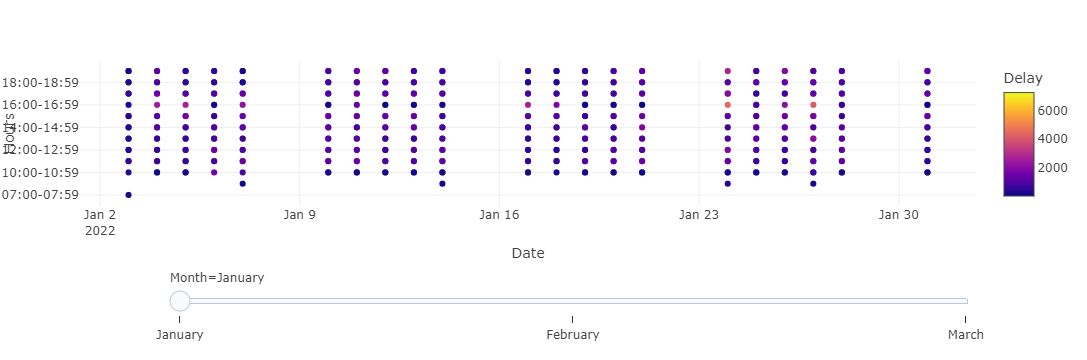

In [76]:
#fig=plt.figure(figsize=(12,12), dpi= 100, facecolor='w', edgecolor='k')
fig = px.scatter(data2022_groupbyHours, x="Date", y="Hours", animation_frame="Month",  # animation_group="LocationIn",hover_name="LocationIn" ,
           color="Delay"
           ) # , range_x=[     100,100000], range_y=[25,90], 

fig["layout"].pop("updatemenus") # optional, drop animation buttons

fig.update_yaxes(categoryorder="category ascending")
fig.update_layout(template="none")
fig.show()

fig.write_image("Figures/scatterplotHourFC20202022.png")

In [77]:
#pip install -U kaleido

## Exploring delay of certain truck using certain gate

In [89]:
data2022['Transponder'].mode()

0    45734
Name: Transponder, dtype: int64

In [90]:
# Lets read data for Transponder 17107

mask = data2022['Transponder']== 45734 #data2022['Transponder'].mode()
 
data_T17107 = data2022[mask]


In [79]:
data_T17107

Empty DataFrame
Columns: [Transponder, LocationIn, LocationOut, TimeIn, TimeOut, Delay, Date, Weekday, Month, Hours, Time Of Day]
Index: []

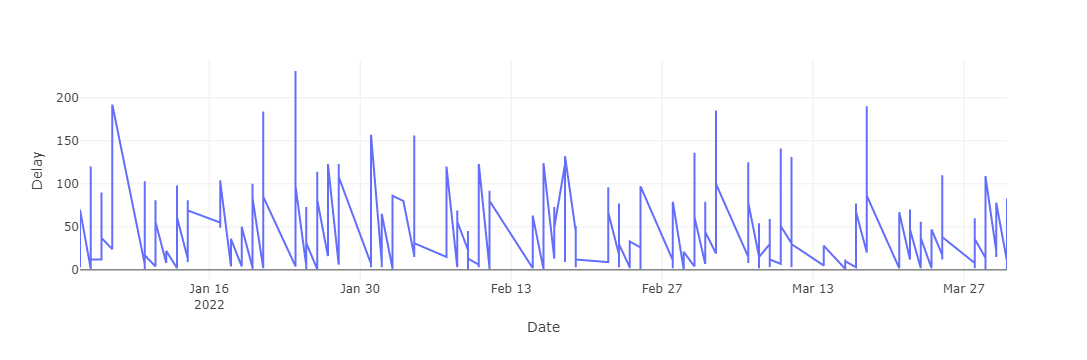

In [91]:
fig = px.line(data_T17107, x='Date', y= 'Delay')
fig.update_layout(template="none")
fig.show() 

# Remarks